In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("gemini_official_response.csv")

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Patient ID,Category,Result
0,OAS1_0316_MR1,AD,B
1,OAS1_0067_MR1,AD,A
2,OAS1_0073_MR1,AD,A
3,OAS1_0388_MR1,AD,A
4,OAS1_0405_MR1,AD,A


In [ ]:
df['Category'] = df['Category'].replace({'AD':'Probable AD','Non_AD':'No Probable AD'})
df['Result'] = df['Result'].replace({'A': 'Probable AD','B':'No Probable AD'})

In [ ]:
df.head()

,Patient ID,Category,Result
0,OAS1_0316_MR1,Probable AD,No Probable AD
1,OAS1_0067_MR1,Probable AD,Probable AD
2,OAS1_0073_MR1,Probable AD,Probable AD
3,OAS1_0388_MR1,Probable AD,Probable AD
4,OAS1_0405_MR1,Probable AD,Probable AD


In [ ]:
df['Result'].value_counts()

,count
Result,
Probable AD,36
No Probable AD,24


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
df.rename(columns={'Category':'Actual Category','Result':'Predicted Category'},inplace=True)
df['Actual Category'] = df['Actual Category'].astype(str)
df['Predicted Category'] = df['Predicted Category'].astype(str)
actual = df['Actual Category']
pred =  df['Predicted Category']
df_confusion = pd.crosstab(actual, pred)
df_confusion = df_confusion.reindex(index=['Probable AD', 'No Probable AD'], columns=['Probable AD', 'No Probable AD'])
print(df_confusion)

Predicted Category  Probable AD  No Probable AD
Actual Category                                
Probable AD                  23               7
No Probable AD               13              17


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

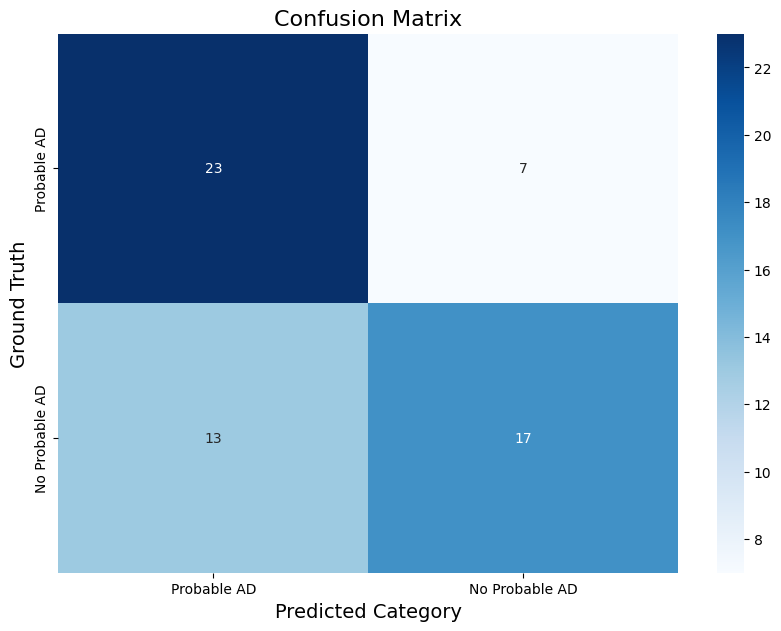

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df_confusion, annot=True, fmt='d', cmap='Blues')

# Add labels and a title
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Category', fontsize=14)
plt.ylabel('Ground Truth', fontsize=14)
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix


# Example data: Replace with your actual and predicted categories
actual = df['Actual Category']
pred = df['Predicted Category']

# Get the unique classes
classes = sorted(actual.unique())

# Generate the confusion matrix
cm = confusion_matrix(actual, pred, labels=classes)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Initialize a dictionary to store TP, TN, FP, FN
metrics = {}

# Calculate TP, TN, FP, FN for each class
for i, cls in enumerate(classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    metrics[cls] = {
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN
    }

# Convert metrics to a DataFrame for better display
metrics_df = pd.DataFrame(metrics).transpose()

# Print the results

print(metrics_df)

                TP  TN  FP  FN
No Probable AD  17  23   7  13
Probable AD     23  17  13   7


In [ ]:
TP_A = 23
TP_B = 17
TN_A = 17
TN_B = 23
FP_A = 13
FP_B = 7
FN_A = 7
FN_B = 13

In [ ]:
# Function to calculate metrics
def calculate_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Specificity": specificity
    }

# Calculate metrics for Class A
metrics_A = calculate_metrics(TP_A, TN_A, FP_A, FN_A)

# Calculate metrics for Class B
metrics_B = calculate_metrics(TP_B, TN_B, FP_B, FN_B)

# Print the results
print("Metrics for PE-Positive:")
for key, value in metrics_A.items():
    print(f"{key}: {value:.4f}")

print("\nMetrics for PE-Negative:")
for key, value in metrics_B.items():
    print(f"{key}: {value:.4f}")

Metrics for PE-Positive:
Accuracy: 0.6667
Precision: 0.6389
Recall: 0.7667
F1-Score: 0.6970
Specificity: 0.5667

Metrics for PE-Negative:
Accuracy: 0.6667
Precision: 0.7083
Recall: 0.5667
F1-Score: 0.6296
Specificity: 0.7667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

                precision    recall  f1-score   support

No Probable AD       0.71      0.57      0.63        30
   Probable AD       0.64      0.77      0.70        30

      accuracy                           0.67        60
     macro avg       0.67      0.67      0.66        60
  weighted avg       0.67      0.67      0.66        60



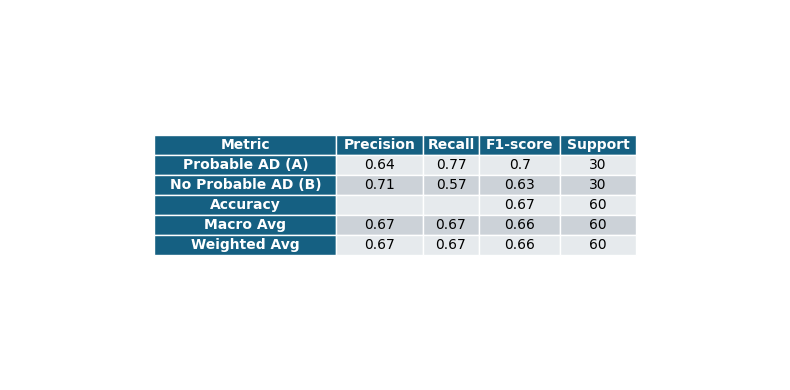

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    "Metric": ["Probable AD (A)", "No Probable AD (B)", "Accuracy", "Macro Avg", "Weighted Avg"],
    "Precision": [0.64, 0.71, "", 0.67, 0.67],
    "Recall": [0.77, 0.57, "", 0.67, 0.67],
    "F1-score": [0.70, 0.63, 0.67, 0.66, 0.66],
    "Support": [30, 30, 60, 60, 60]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot a table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')


# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Style the header and first column
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('white')
    if row == 0:  # Header row
        cell.set_facecolor('#156082')  # Dark blue
        cell.set_text_props(color='white', weight='bold')
    elif col == 0:  # First column
        cell.set_facecolor('#156082')  # Same dark blue as header
        cell.set_text_props(color='white', weight='bold')
    elif row % 2 == 0:  # Alternating row colors
        cell.set_facecolor('#CCD2D8')  # Light gray
    else:
        cell.set_facecolor('#E6EAED')  # White background


# Save or display the table
plt.tight_layout()
plt.show()